## ThinkDSP

This notebook contains code examples from Chapter 1: Sounds and Signals

Copyright 2015 Allen Downey

License: [Creative Commons Attribution 4.0 International](http://creativecommons.org/licenses/by/4.0/)

### On Line Book

[Think DSP: Digital Signal Processing in Python](http://greenteapress.com/thinkdsp/html/index.html)


### Signals

Here are the modules we'll need.

* `thinkdsp` is a module that accompanies _Think DSP_ and provides classes and functions for working with signals.

* `thinkplot` is a wrapper around matplotlib.

[Documentation of the thinkdsp module is here](http://greenteapress.com/thinkdsp.html). 

In [257]:
from __future__ import print_function, division

%matplotlib inline

try:
    import thinkdsp
    import thinkplot
except:
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkplot.py
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkstats2.py

import thinkdsp
import thinkplot
    
import numpy as np

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from IPython.display import display

In [258]:
len(dir(thinkdsp)), len(dir(thinkplot))

In [259]:
!wget https://github.com/AllenDowney/ThinkDSP/blob/master/code/thinkdsp.py

'wget' 不是內部或外部命令、可執行的程式或批次檔。


Instantiate cosine and sine signals.

In [260]:
cos_sig= thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig= thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)

cos_sig, sin_sig

(<thinkdsp.Sinusoid at 0x222242eb7c8>, <thinkdsp.Sinusoid at 0x222242eb788>)

#### 獲得 物件的說明 (查字典)

- cos_sig?
- cos_sig??
- dir(cos_sig), 
- help(cos_sig)


In [261]:
cos_sig?

Plot the sine and cosine signals.  By default, `plot` plots three periods.  

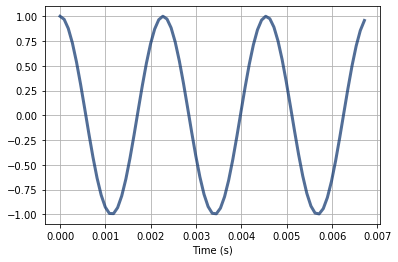

In [262]:
cos_sig.plot()
thinkplot.config(xlabel='Time (s)'); 

import matplotlib.pyplot as pl
pl.grid()

Notice that the frequency of the sine signal is doubled, so the period is halved.

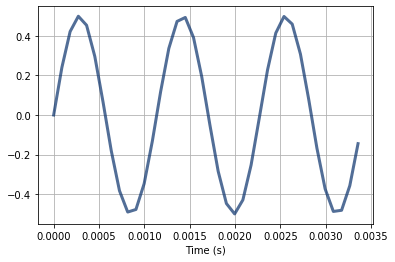

In [263]:
sin_sig.plot()
thinkplot.config(xlabel='Time (s)'); 

pl.grid('on')

The sum of two signals is a SumSignal.

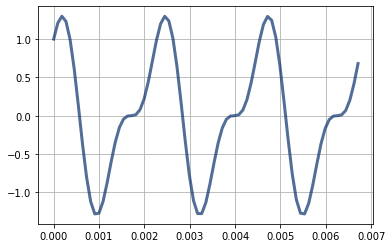

In [264]:
mix= sin_sig + cos_sig

mix.plot()

pl.grid()

Here's the documentation for `thinkdsp.py`: http://greenteapress.com/thinkdsp/thinkdsp.html

In [265]:
### Get the whole source code..

thinkdsp??

In [266]:
# using sympy....

import sympy as sy
sy.init_printing()

t, f, A, ϕ = sy.symbols('t, f, A, ϕ')

t,f,A, ϕ

xcos= A * sy.cos(2*sy.pi*f*t + ϕ)
xsin= A * sy.sin(2*sy.pi*f*t + ϕ)
xcos, xsin


from sympy import cos, sin, pi
xcos= A * cos(2*pi*f*t + ϕ)
xsin= A * sin(2*pi*f*t + ϕ)
xcos, xsin

x= xcos.subs({A:10, f:440, t:.01, ϕ:0})
x, x.evalf()

xL=[]
for i in range(0,100):
    tt= i/100
    x= xcos.subs({A:10, f:440, t: tt, ϕ:0})
    x= x.evalf()
    #print(tt, x)
    xL+= [(tt,x)]
#xL

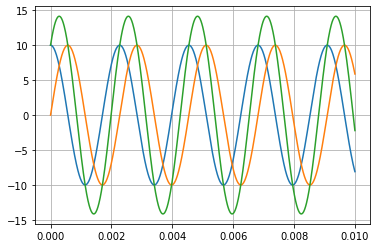

In [267]:
# using nympy ....
import numpy as np
import matplotlib.pyplot as pl

π= np.pi

A=  10
f= 440
ϕ=   0
t= np.linspace(0,.01,1001)

xcos= A * np.cos(2*π*f*t+ϕ)
xsin= A * np.sin(2*π*f*t+ϕ)

xcos, xsin

pl.plot(t, xcos, t, xsin, t, xcos+xsin); pl.grid('on')

### 【ry解說】 

訊號的 Amplitude (in volt), Frequency (in Hz), Phase (in rad)

In [268]:
import numpy as np
import matplotlib.pyplot as pl
π= np.pi


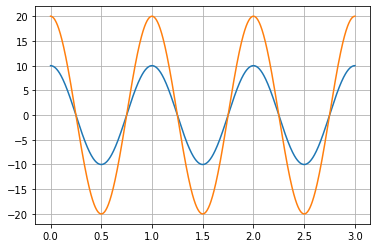

In [269]:
t= np.linspace(0, 3, 1001) #sec

f=   1 # Hz
ϕ=   0 # rad

A1= 10 # volts
A2= 20 # volts

xcos1= A1 * np.cos(2*π*f*t + ϕ)
xcos2= A2 * np.cos(2*π*f*t + ϕ)

pl.plot(t,xcos1, t, xcos2); pl.grid()

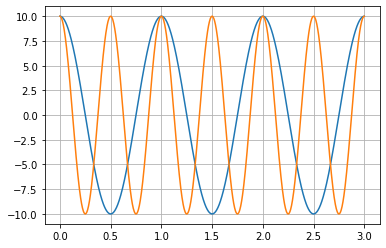

In [270]:
A= 10

f1= 1
f2= 2

xcos1= A * np.cos(2*π*f1*t + ϕ)
xcos2= A * np.cos(2*π*f2*t + ϕ)

pl.plot(t,xcos1, t, xcos2); pl.grid()

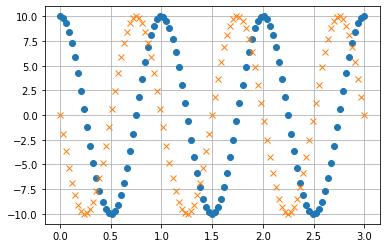

In [271]:
A= 10
f= 1
ϕ1= 0 
ϕ2= (2*π) * 1/4 



t= np.linspace(0,3, 101)
xcos1= A * np.cos(2*π*f*t + ϕ1)
xcos2= A * np.cos(2*π*f*t + ϕ2)

pl.plot(t,xcos1, 'o', t, xcos2, 'x'); pl.grid()


### 【ry解說】

- 1個週期 為 (2*π) rad, 
- ϕ2 - ϕ1 = (2*π) * 1/4 
- 代表 信號2 比 信號1 【超前】 1/4 個週期。
- 在 信號圖形中， 
- 信號2 ('x') 先到達最低點 大約在 t2= 0.25 之處，
- 然後  大約 在 t1= 0.50 處，信號1 ('o')，才到達最低點。
- 這個差別 Δt= t2-t1 = 0.25 = 1/4 秒，就是 1/4 週期，
- 本題的 f= 1Hz，故週期也是 1 sec 之故。

### Waves

A Signal represents a mathematical function defined for all values of time.  

If you evaluate a signal at a sequence of equally-spaced times, the result is a 【Wave】.  

`framerate` (取樣率, Sampleing Rate) is the `number of samples per second`.

In [272]:
cos_sig= thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
cos_sig??

In [273]:
wave= cos_sig.make_wave(duration=0.5, start=0, framerate=11025)
wave??

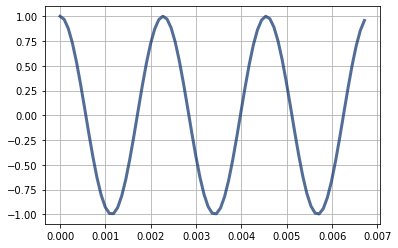

In [274]:
cos_sig.plot();pl.grid()

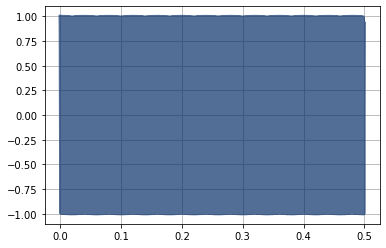

In [275]:
wave.plot(); pl.grid()

In [276]:
wave.ts, wave.ys

(array([0.00000000e+00, 9.07029478e-05, 1.81405896e-04, ...,
        4.99682540e-01, 4.99773243e-01, 4.99863946e-01]),
 array([1.        , 0.96872473, 0.87685522, ..., 0.63895963, 0.80985363,
        0.93009084]))

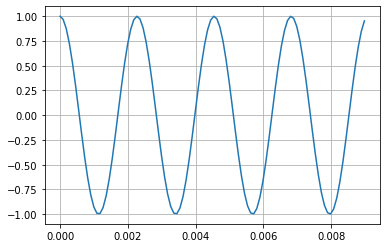

In [277]:
n= np.arange(0,100)
pl.plot(wave.ts[n], wave.ys[n]); pl.grid()

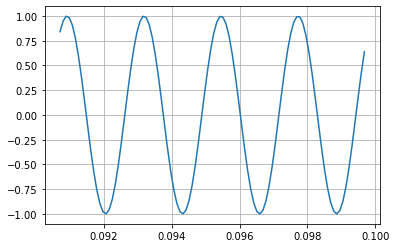

In [278]:
n= np.arange(1000,1100)
pl.plot(wave.ts[n], wave.ys[n]); pl.grid()

### 聽聽看....

IPython provides an Audio widget that can play a wave.


In [279]:
from IPython.display import Audio

Audio?

## 2 個重要的資訊要提供 給 它，
## 1個是要撥放的聲音資料本身 (data)，
## 另1個是 取樣率 (rate)


In [280]:
audio= Audio(data= wave.ys, rate= wave.framerate)
audio

Wave also provides `make_audio()`, which does the same thing:

In [281]:
wave.make_audio??
# Allen 把 上面的功能包成 1個方法 (method)，寫進 Wave 物件之中。
# 然後既是在物件內部，因此，其 ys, 以及 framerate 就內部傳遞就好，
# 不要寫出來外面了。 這是物件導向程式設計的理念。
wave.make_audio()

The `ys` attribute is a NumPy array that contains the values from the signal.  The interval between samples is the inverse of the framerate.

In [282]:
print('Number of samples', len(wave.ys))
print('Timestep in sec', 1 / wave.framerate)

Number of samples 5512
Timestep in sec 9.070294784580499e-05


Signal objects that represent periodic signals have a `period` attribute.

In [283]:
period = cos_sig.period
period

Wave provides a method `segment`, which creates a new wave.  

So we can pull out a 3 period segment of this wave.

In [284]:
wave.segment?

In [285]:
segment= wave.segment(start= 0, duration= period*3)
segment

Wave provides `plot`

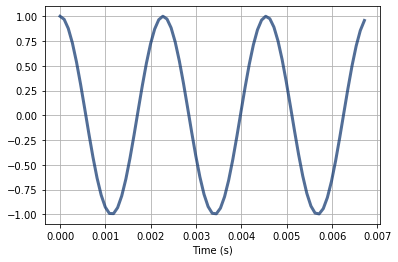

In [286]:
segment.plot()
thinkplot.config(xlabel='Time (s)')
pl.grid()

`normalize` scales a wave so the range doesn't exceed -1 to 1.

`apodize` tapers the beginning and end of the wave so it doesn't click when you play it.

In [287]:
wave.apodize??

In [288]:
thinkdsp.apodize??

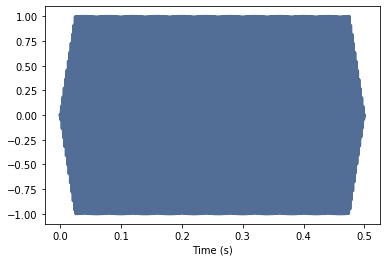

In [289]:
wave.normalize()
wave.apodize()
wave.plot()
thinkplot.config(xlabel='Time (s)')

### 把製造出來的聲音存檔

You can write a wave to a WAV file.

In [290]:
wave.write??

In [291]:
wave.write('temp.wav')

Writing temp.wav


In [292]:
!dir temp.wav

# 在 colab 上要用 
# !ls

 磁碟區 E 中的磁碟沒有標籤。
 磁碟區序號:  5453-69C6

 E:\OneDrive\__ryGithub2020\_ryDsp2020\code 的目錄

2020/02/26  上午 02:59            11,068 temp.wav
               1 個檔案          11,068 位元組
               0 個目錄  592,859,807,744 位元組可用


`wave.write` writes the wave to a file so it can be used by an exernal player.

In [293]:
thinkdsp.play_wave(filename='temp.wav', player='ffplay -autoexit') ## 作業系統上的聲音撥放器

`read_wave` reads WAV files.  The WAV examples in the book are from freesound.org.  In the contributors section of the book, I list and thank the people who uploaded the sounds I use.

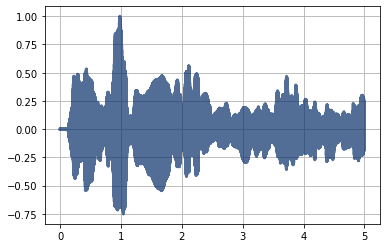

In [294]:
# 在 Colab 上，硬碟空間的存取不像本地端的硬碟那麼方便，
# 要找出聲音資料的網址，然後用 Linux 的指令先把它撈到 Colab 的 雲端硬碟中的目前目錄。
#
#url= 'raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav'
#!wget raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/92002__jcveliz__violin-origional.wav

wavFilename= '92002__jcveliz__violin-origional.wav'
wave= thinkdsp.read_wave(wavFilename)
wave.plot()
pl.grid()

In [295]:
audio= wave.make_audio()
audio

In [296]:
# thinkdsp.play_wave(filename= wavFilename, player='ffplay -autoexit') ## 作業系統上的聲音撥放器


### 拉一小段出來仔細瞧瞧，只能看到外圍，內部細節無法詳查。

I pulled out a segment of this recording where the pitch is constant.  
When we plot the segment, we can't see the waveform clearly, 
but we can see the `envelope`, which tracks the change in `amplitude` during the segment.

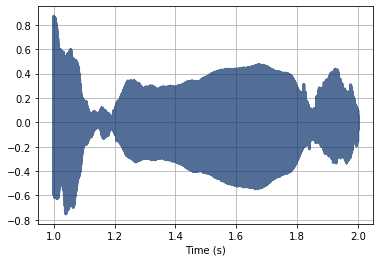

In [297]:
start=    1
duration= 1
segment= wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

pl.grid()

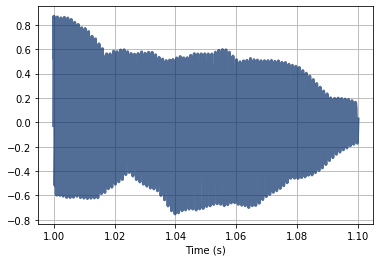

In [298]:
# 把 時間視窗縮小，就像顯微鏡，倍率一直放大下去，視野就越來越小 ....

duration= .1

segment= wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

pl.grid()

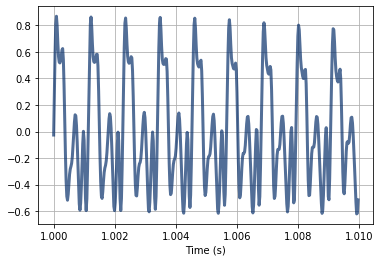

In [299]:

duration= .01

segment= wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

pl.grid()

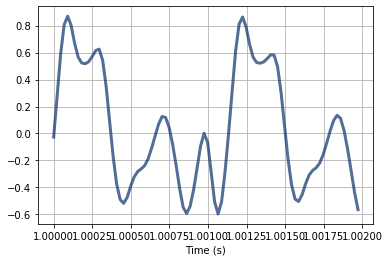

In [300]:
# 直到能看清楚幾乎是最底層的細節時(信號之週期或者頻率)，
# 時間視窗已是縮小到 1/1000 秒 左右的範圍。

duration= .002

segment= wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

pl.grid()


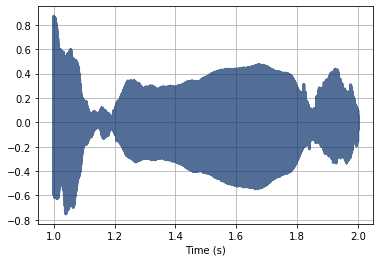

In [301]:
duration= 1 # 返回 1 sec

segment= wave.segment(start, duration)
segment.plot()
thinkplot.config(xlabel='Time (s)')

pl.grid()




## [Spectrum](https://en.wikipedia.org/wiki/Spectrum)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/Rainbow_above_Kaviskis_Lake%2C_Lithuania.jpg/170px-Rainbow_above_Kaviskis_Lake%2C_Lithuania.jpg)

### 於是我們就得介紹 頻譜 (光譜) 的概念....


### Spectrums

Wave provides `make_spectrum`, which computes the spectrum of the wave.

In [302]:
spectrum = segment.make_spectrum()
spectrum??

Spectrum provides `plot`

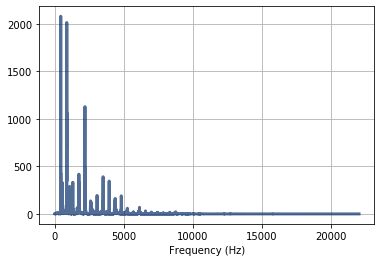

In [303]:
spectrum.plot()
thinkplot.config(xlabel='Frequency (Hz)')
pl.grid()


The frequency components above 10 kHz are small.  We can see the lower frequencies more clearly by providing an upper bound:

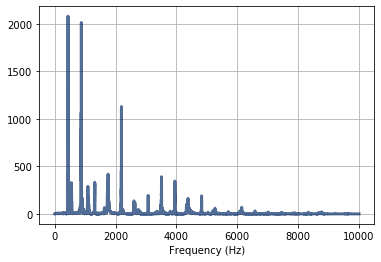

In [304]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')
pl.grid()


Spectrum provides `low_pass`, which applies a low pass filter; that is, it attenuates all frequency components above a cutoff frequency.

In [305]:
spectrum.low_pass(3000)


The result is a spectrum with fewer components.

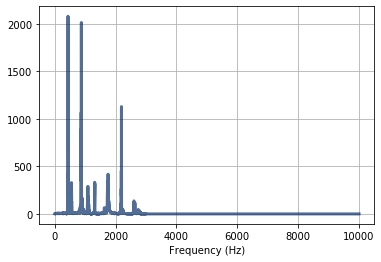

In [306]:
spectrum.plot(high=10000)
thinkplot.config(xlabel='Frequency (Hz)')
pl.grid()


We can convert the filtered spectrum back to a wave:

In [307]:
filtered = spectrum.make_wave()

And then normalize it to the range -1 to 1.

In [308]:
filtered.normalize()

Before playing it back, I'll apodize it (to avoid clicks).

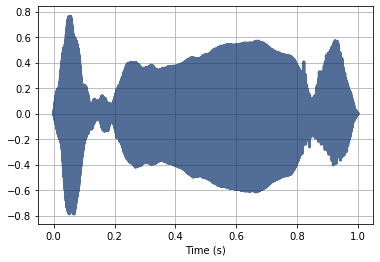

In [309]:
filtered.apodize()
filtered.plot()
thinkplot.config(xlabel='Time (s)')
pl.grid()

And I'll do the same with the original segment.

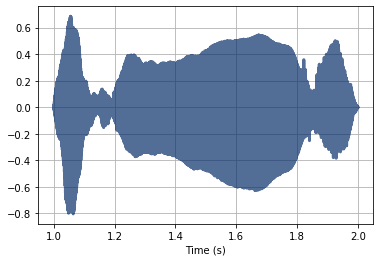

In [310]:
segment.normalize()
segment.apodize()
segment.plot()
thinkplot.config(xlabel='Time (s)')
pl.grid()

Finally, we can listen to the original segment and the filtered version.

In [311]:
segment.make_audio()


In [312]:
filtered.make_audio()

The original sounds more complex, with some high-frequency components that sound buzzy.
The filtered version sounds more like a pure tone, with a more muffled quality.  The cutoff frequency I chose, 3000 Hz, is similar to the quality of a telephone line, so this example simulates the sound of a violin recording played over a telephone.

**Exercise 1:** Run the code in the following cells to create a `Signal` with two frequency components, and then create a `Wave` that contains a half-second sample from the `Signal`.

Add code to compute and plot the `Spectrum` of this `Wave`.

Then add another `Signal` to the mix, recompute the `Wave` and look at the `Spectrum`.

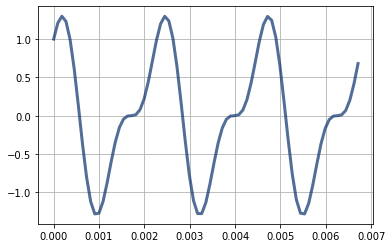

In [313]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)
mix = cos_sig + sin_sig
mix.plot()
pl.grid()


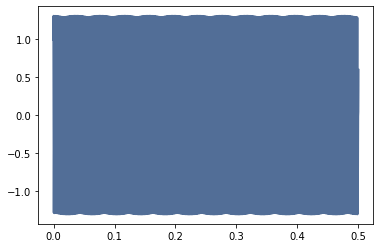

In [314]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave.plot()

### Interaction

The following example shows how to use interactive IPython widgets.

In [315]:
def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    thinkplot.show(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

Adjust the sliders to control the start and duration of the segment and the cutoff frequency applied to the spectrum.

In [316]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

## 好的開始~~~~